In [103]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df = pd.read_csv("data/Train.csv")

In [128]:
df.shape

(30557, 82)

In [105]:
df.head(1)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.5,92,11.0,60.200001,0.00804,18.51684,1.996377,-1.227395,0.000074,0.000156,-1.23133,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.0,76.536426,38.593017,-61.752587,22.363665,0.02108,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.00001,0.0,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,NaN,NaN,0.0,NaN,NaN,NaN,76.536426,38.593017,-61.752587,22.363665,NaN,-1.23133,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.00004,-1.861476,0.0,76.536426,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118


We need at leas 10 entries for the time series, so we drop all groups with less than 13 entries

In [106]:
# Convert 'Date' to datetime if not already done
df['Date'] = pd.to_datetime(df['Date'])
# Create empty lists to store train and test DataFrames
train_dfs = []
test_dfs = []
# Creating subsets of locations
location_groups = df.groupby('Place_ID')
# Filter out groups that have fewer than 13 unique dates
filtered_groups = {
    location: sub_df for location, sub_df in location_groups 
    if sub_df['Date'].nunique() >= 13
}
# Debug: Print number of filtered groups
print(f"Number of filtered groups (locations with >=13 unique dates): {len(filtered_groups)}")
# Iterate through each filtered group
for location, sub_df in filtered_groups.items():
    # Sort each subset DataFrame by the 'Date' column in ascending order
    sub_df = sub_df.sort_values(by='Date', ascending=True)
    # Debug: Check the number of rows in the sorted sub_df
    print(f"Location: {location}, Number of rows: {len(sub_df)}")
    # Select the last three rows for the test set
    test_df = sub_df.tail(3)
    # Select the remaining rows for the train set
    train_df = sub_df.iloc[:-3]
    # Debug: Verify the number of rows in train and test sets for this location
    print(f"Location: {location}, Train Rows: {len(train_df)}, Test Rows: {len(test_df)}")
    # Append the split dataframes to their respective lists
    train_dfs.append(train_df)
    test_dfs.append(test_df)
# Concatenate all the train and test DataFrames into separate DataFrames
df_train_split = pd.concat(train_dfs, ignore_index=True)
df_test_split = pd.concat(test_dfs, ignore_index=True)
# Display or use the resulting DataFrames
print("Training set:")
print(df_train_split.head())  # Display the first few rows for verification
print("\nTest set:")
print(df_test_split.head())   # Display the first few rows for verification
# Check the number of rows in the test set for each location to verify correctness
print("\nNumber of rows per Place_ID in the test set:")
print(df_test_split['Place_ID'].value_counts())




Number of filtered groups (locations with >=13 unique dates): 337
Location: 010Q650, Number of rows: 94
Location: 010Q650, Train Rows: 91, Test Rows: 3
Location: 05EC30X, Number of rows: 90
Location: 05EC30X, Train Rows: 87, Test Rows: 3
Location: 0DPWHX8, Number of rows: 94
Location: 0DPWHX8, Train Rows: 91, Test Rows: 3
Location: 0GBXTHY, Number of rows: 94
Location: 0GBXTHY, Train Rows: 91, Test Rows: 3
Location: 0HYPV1N, Number of rows: 94
Location: 0HYPV1N, Train Rows: 91, Test Rows: 3
Location: 0I2XREH, Number of rows: 65
Location: 0I2XREH, Train Rows: 62, Test Rows: 3
Location: 0KV6RJ1, Number of rows: 94
Location: 0KV6RJ1, Train Rows: 91, Test Rows: 3
Location: 0MGEY68, Number of rows: 94
Location: 0MGEY68, Train Rows: 91, Test Rows: 3
Location: 0O9R6AD, Number of rows: 92
Location: 0O9R6AD, Train Rows: 89, Test Rows: 3
Location: 0PP73FZ, Number of rows: 94
Location: 0PP73FZ, Train Rows: 91, Test Rows: 3
Location: 0RYZQUU, Number of rows: 91
Location: 0RYZQUU, Train Rows: 88, T

In [107]:
df_train_split.head(1)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.5,92,11.0,60.200001,0.00804,18.51684,1.996377,-1.227395,0.000074,0.000156,-1.23133,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.0,76.536426,38.593017,-61.752587,22.363665,0.02108,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.00001,0.0,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,NaN,NaN,0.0,NaN,NaN,NaN,76.536426,38.593017,-61.752587,22.363665,NaN,-1.23133,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.00004,-1.861476,0.0,76.536426,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118


In [108]:


#  Sort the DataFrame by 'Place_ID' and 'Date' to ensure correct ordering
df_train_split = df_train_split.sort_values(by=['Place_ID', 'Date'])

#  Group the data by 'Place_ID' and apply the time series shift
df_train_split['lag1'] = df_train_split.groupby('Place_ID')['target'].shift(1)

#  Drop rows where 'log1' is NaN (the first row in each group)
df_train_split = df_train_split.dropna(subset=['lag1'])

#  Reset the index if needed (optional)
df_train_split = df_train_split.reset_index(drop=True)

# Display the final DataFrame
df_train_split.head(1)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle,lag1
0,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.6,48.799999,0.00839,22.546533,3.33043,-1.188108,0.000076,0.000197,-1.082553,0.01836,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000055,6156.074219,0.000021,0.115179,233.313706,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.022017,1148.985447,61.216687,841116.763051,-57.0152,61.402626,-74.457583,33.089495,0.000114,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.000171,0.858446,175.019862,99354.162958,0.059358,5.958538,175.072145,99353.672374,-14.708036,59.624912,-67.693509,28.614804,0.315403,-1.082553,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.00015,0.433957,0.00005,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652,38.0


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

spearson correlation num - best 5 features - dont take lag 1

pearson categorical

location is a categorical one

check if the features are independent ?  (multicolinearity problem)

In [110]:
# Step 1: Exclude 'Place_ID' and 'Date' and select only numeric columns
numeric_df = df_train_split.drop(columns=['Place_ID', 'Date']).select_dtypes(include=['float64', 'int64'])

# Step 2: Pearson Correlation (linear relationship)
pearson_corr = numeric_df.corr(method='pearson')

# Order by absolute value of the correlation with target
pearson_corr_sorted = pearson_corr['target'].abs().sort_values(ascending=False)
print("Pearson Correlation with Target (Ordered by Absolute Value):")
print(pearson_corr_sorted)

# Step 3: Spearman Correlation (monotonic relationship)
spearman_corr = numeric_df.corr(method='spearman')

# Order by absolute value of the correlation with target
spearman_corr_sorted = spearman_corr['target'].abs().sort_values(ascending=False)
print("\nSpearman Correlation with Target (Ordered by Absolute Value):")
print(spearman_corr_sorted)

Pearson Correlation with Target (Ordered by Absolute Value):
target                                                 1.000000
lag1                                                   0.846698
target_min                                             0.818921
target_max                                             0.630196
L3_CO_CO_column_number_density                         0.401326
L3_HCHO_tropospheric_HCHO_column_number_density        0.350505
L3_HCHO_HCHO_slant_column_number_density               0.324131
L3_NO2_NO2_slant_column_number_density                 0.321926
L3_AER_AI_sensor_altitude                              0.309995
L3_NO2_NO2_column_number_density                       0.308377
L3_CO_sensor_altitude                                  0.302647
L3_NO2_tropospheric_NO2_column_number_density          0.295284
L3_AER_AI_solar_azimuth_angle                          0.193152
L3_O3_solar_azimuth_angle                              0.187866
L3_CLOUD_solar_azimuth_angle               

In [111]:
# Exclude 'target', 'log1', 'lag1', 'target_min', 'target_max'
excluded_features = ['target', 'lag1', 'target_min', 'target_max']

# Filter the Pearson correlations excluding the specified features
filtered_features = pearson_corr_sorted.drop(excluded_features)

# Get the top 5 remaining features by Pearson correlation
top_5_filtered_features = filtered_features.index[:12]  # Get the next top 5 features
print("Top 7 features for linear regression model (excluding specified):", top_5_filtered_features)

Top 7 features for linear regression model (excluding specified): Index(['L3_CO_CO_column_number_density',
       'L3_HCHO_tropospheric_HCHO_column_number_density',
       'L3_HCHO_HCHO_slant_column_number_density',
       'L3_NO2_NO2_slant_column_number_density', 'L3_AER_AI_sensor_altitude',
       'L3_NO2_NO2_column_number_density', 'L3_CO_sensor_altitude',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_AER_AI_solar_azimuth_angle', 'L3_O3_solar_azimuth_angle',
       'L3_CLOUD_solar_azimuth_angle', 'target_variance'],
      dtype='object')


FINDINGS PEARSON (TOP 7)

L3_CO_CO_column_number_density                         0.393221
L3_HCHO_tropospheric_HCHO_column_number_density        0.349700
L3_HCHO_HCHO_slant_column_number_density               0.325961
L3_AER_AI_sensor_altitude                              0.316445
L3_NO2_NO2_slant_column_number_density                 0.312890
L3_CO_sensor_altitude                                  0.311183
L3_NO2_NO2_column_number_density                       0.302320

FINDING SPEARSON (TOP 7)

L3_AER_AI_sensor_altitude                              0.387518
L3_HCHO_tropospheric_HCHO_column_number_density        0.387201
L3_CO_sensor_altitude                                  0.378116
L3_NO2_tropospheric_NO2_column_number_density          0.375973
L3_HCHO_HCHO_slant_column_number_density               0.370443
L3_CO_CO_column_number_density                         0.348571
L3_NO2_NO2_column_number_density                       0.334212



Scenario 1:
Pearson = 0.85, Spearman = 0.88: Both show a strong correlation, likely a linear relationship.

Scenario 2:
Pearson = 0.30, Spearman = 0.80: The relationship is likely non-linear but still monotonic (curved trend).

Scenario 3:
Pearson = 0.80, Spearman = 0.40: There may be outliers or rank inconsistencies affecting Spearman's result.

1. L3_AER_AI_sensor_altitude  = Spearson 0.387518 Pearson 0.316445
2. L3_HCHO_tropospheric_HCHO_column_number_density = SP 0.387201 Pearson 0.349700
3. L3_CO_sensor_altitude = SP 0.378116 > P 0.311183
4. L3_HCHO_HCHO_slant_column_number_density    = SP 0.370443 > 0.325961
5. L3_CO_CO_column_number_density = SP 0.348571 < P 0.393221

Based on your provided list, after excluding the specified features, the next top features are:

L3_CO_CO_column_number_density: Pearson = 0.393
L3_HCHO_tropospheric_HCHO_column_number_density: Pearson = 0.350
L3_HCHO_HCHO_slant_column_number_density: Pearson = 0.326
L3_AER_AI_sensor_altitude: Pearson = 0.316
L3_NO2_NO2_slant_column_number_density: Pearson = 0.313

These features have strong linear correlations with the target and can be good predictors for your regression model.

In [112]:
df_train_split.head(1)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle,lag1
0,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.6,48.799999,0.00839,22.546533,3.33043,-1.188108,0.000076,0.000197,-1.082553,0.01836,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000055,6156.074219,0.000021,0.115179,233.313706,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.022017,1148.985447,61.216687,841116.763051,-57.0152,61.402626,-74.457583,33.089495,0.000114,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.000171,0.858446,175.019862,99354.162958,0.059358,5.958538,175.072145,99353.672374,-14.708036,59.624912,-67.693509,28.614804,0.315403,-1.082553,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.00015,0.433957,0.00005,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652,38.0


Correlation Matrix:
                                                 L3_CO_CO_column_number_density   
L3_CO_CO_column_number_density                                         1.000000  \
L3_HCHO_tropospheric_HCHO_column_number_density                        0.278641   
L3_HCHO_HCHO_slant_column_number_density                               0.349252   
L3_AER_AI_sensor_altitude                                             -0.400094   
L3_NO2_NO2_slant_column_number_density                                 0.190112   

                                                 L3_HCHO_tropospheric_HCHO_column_number_density   
L3_CO_CO_column_number_density                                                          0.278641  \
L3_HCHO_tropospheric_HCHO_column_number_density                                         1.000000   
L3_HCHO_HCHO_slant_column_number_density                                                0.894169   
L3_AER_AI_sensor_altitude                                                        

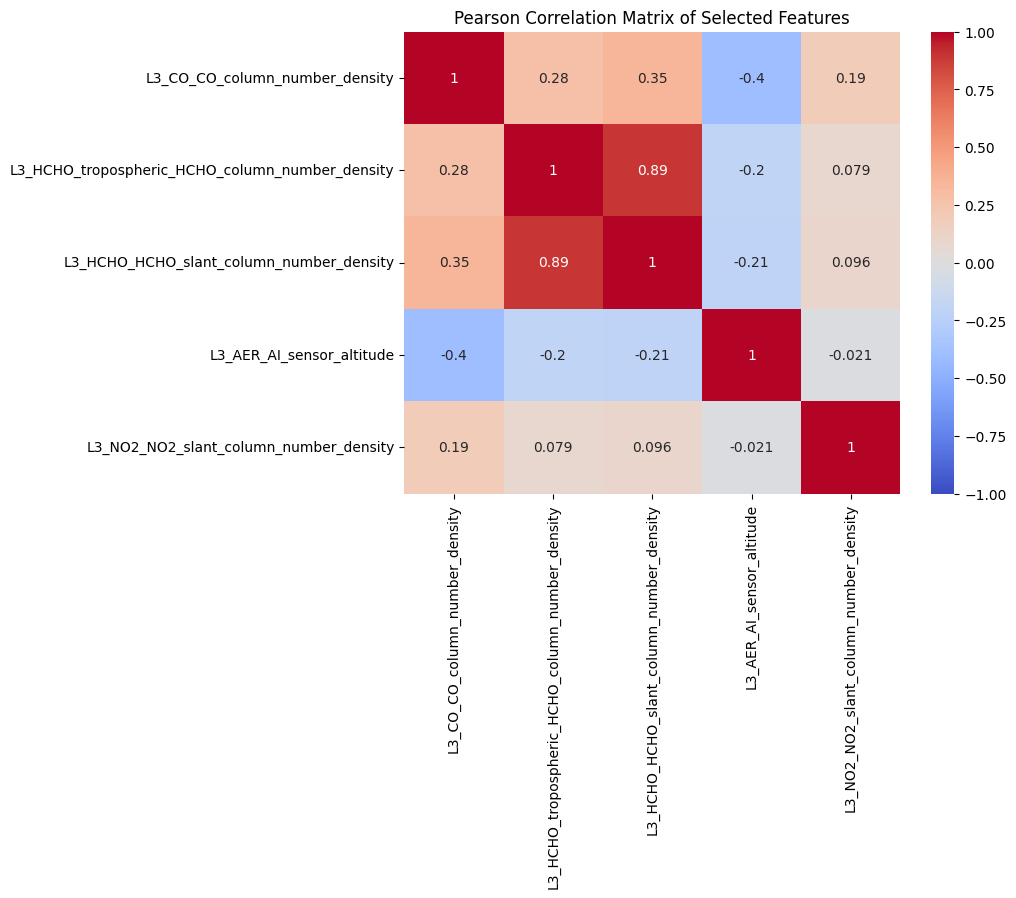

In [113]:
# Select the 5 features for testing independence
features_to_test = df_train_split[['L3_CO_CO_column_number_density', 
                                   'L3_HCHO_tropospheric_HCHO_column_number_density',
                                   'L3_HCHO_HCHO_slant_column_number_density', 
                                   'L3_AER_AI_sensor_altitude', 
                                   'L3_NO2_NO2_slant_column_number_density']]

# Step 1: Calculate the Pearson correlation matrix
correlation_matrix = features_to_test.corr(method='pearson')

# Step 2: Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Step 3: Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix of Selected Features')
plt.show()

Key Insights:
L3_HCHO_tropospheric_HCHO_column_number_density and L3_HCHO_HCHO_slant_column_number_density have a high correlation of 0.90.
This indicates strong multicollinearity between these two features. These features are not independent, and including both in a linear regression model may cause multicollinearity problems. You might want to consider removing one of them.

DROP, column number density and exchange with our top 6 list L3_AER_AI_solar_azimuth_angle

Correlation Matrix:
                                                 L3_CO_CO_column_number_density   
L3_CO_CO_column_number_density                                         1.000000  \
L3_HCHO_tropospheric_HCHO_column_number_density                        0.278641   
L3_NO2_NO2_column_number_density                                       0.205418   
L3_O3_O3_column_number_density                                         0.011341   
u_component_of_wind_10m_above_ground                                  -0.065458   

                                                 L3_HCHO_tropospheric_HCHO_column_number_density   
L3_CO_CO_column_number_density                                                          0.278641  \
L3_HCHO_tropospheric_HCHO_column_number_density                                         1.000000   
L3_NO2_NO2_column_number_density                                                        0.116398   
L3_O3_O3_column_number_density                                                   

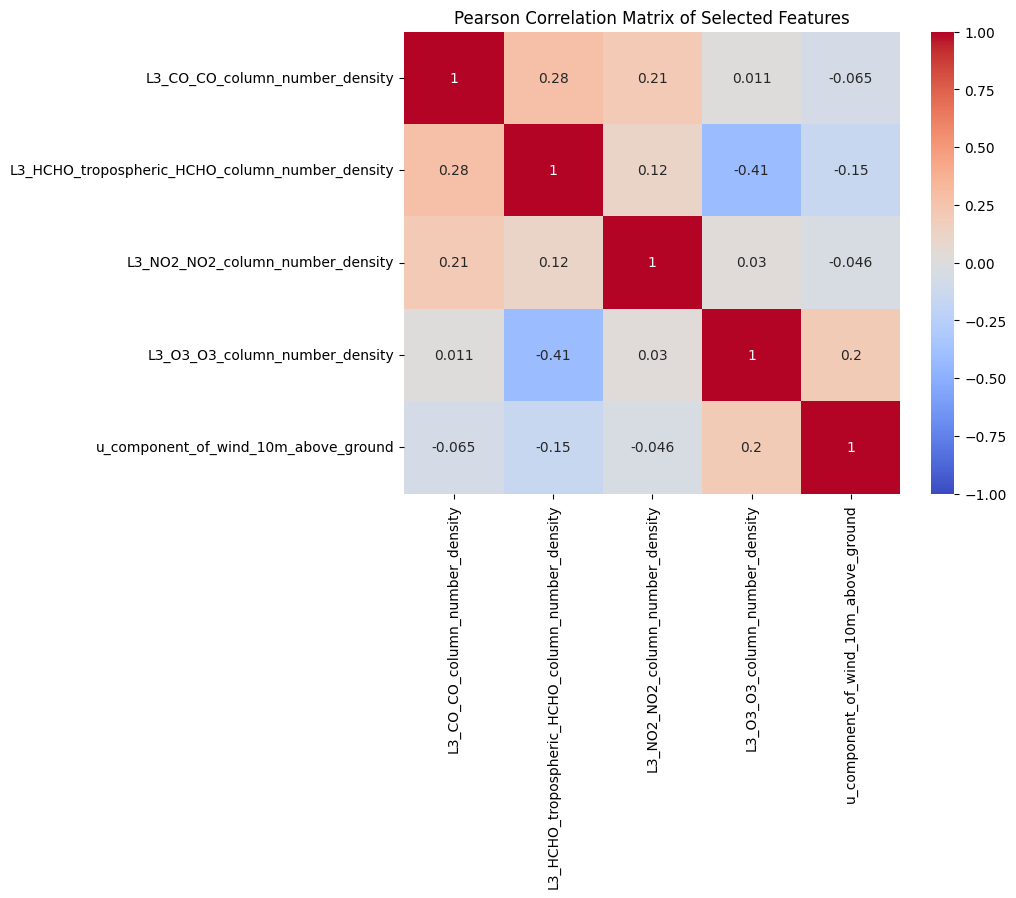

In [114]:
# Select the 5 features for testing independence
features_to_test = df_train_split[["L3_CO_CO_column_number_density", "L3_HCHO_tropospheric_HCHO_column_number_density",
                                   "L3_NO2_NO2_column_number_density", "L3_O3_O3_column_number_density", "u_component_of_wind_10m_above_ground"]]

# Step 1: Calculate the Pearson correlation matrix
correlation_matrix = features_to_test.corr(method='pearson')

# Step 2: Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Step 3: Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix of Selected Features')
plt.show()

These two features have a moderate positive correlation of 0.51. While not a severe case of multicollinearity, a correlation above 0.5 suggests that these features share some linear relationship. You may want to monitor this or consider using one of them, depending on your model's needs.



Comparing the Pearson

In [115]:
num_features = df_train_split[["L3_CO_CO_column_number_density", 
                               "L3_HCHO_tropospheric_HCHO_column_number_density",
                                "L3_NO2_NO2_column_number_density", 
                                "L3_O3_O3_column_number_density", 
                                "u_component_of_wind_10m_above_ground"]]

In [116]:
cat_features = df_train_split[["Place_ID"]]

Steps for Model
1. Standardize or Normalize numerical features
2. Baseline Linear regression
3. Handle Grouping by Location
        Include it as a categorical feature by encoding it.
        Train separate models for each location (if you want to analyze each group separately).
4. Train-Test Split:
Ensure that the train-test split is stratified by Location_ID, especially if your data has time-series characteristics or if locations should not overlap between training and test sets.


In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor





Change numerical variables

Impute mean on groupby

train test split

MAPE instead of MSE

Include Place_ID in the custom transformer for the imputation
Exclude Place_ID in the processing part because its not numerical

Updated Approach:
Modify the GroupImputer to ensure that Place_ID is passed separately.
Ensure the Place_ID is not scaled but is available for group-wise imputation

In [118]:
# Custom transformer for mean imputation per Place_ID
class MeanImputerPerLocation(BaseEstimator, TransformerMixin):
    def __init__(self, numerical_features, group_by_col="Place_ID"):
        self.numerical_features = numerical_features
        self.group_by_col = group_by_col
    def fit(self, X, y=None):
        return self  # No fitting necessary for imputation logic
    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame
        for feature in self.numerical_features:
            X[feature] = X.groupby(self.group_by_col)[feature].transform(lambda x: x.fillna(x.mean()))
        return X
# Define the feature columns
numerical_features = [
    "L3_CO_CO_column_number_density",
    "L3_HCHO_tropospheric_HCHO_column_number_density",
    "L3_NO2_NO2_column_number_density",
    "L3_O3_O3_column_number_density",
    "u_component_of_wind_10m_above_ground"
]
categorical_features = ["Place_ID"]
# Define the preprocessing for numerical features: Standardization
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
# Define the preprocessing for categorical features: One-hot encode Place_ID
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
# Combine preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
# Define the full pipeline with the custom imputer, preprocessing, and regression model
model = Pipeline(steps=[
    ('mean_imputer', MeanImputerPerLocation(numerical_features=numerical_features)),
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
# Define the target variable
y_train = df_train_split["target"]
X_train = df_train_split[numerical_features + categorical_features]
y_test = df_test_split["target"]
X_test = df_test_split[numerical_features + categorical_features]
# Fit the model on the training data
model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)
# Evaluate the model using Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Absolute Percentage Error (MAPE): 0.612787799870785


In [119]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV (removed 'normalize')
param_grid = {
    'regressor__fit_intercept': [True, False],  # Whether to calculate the intercept for the model
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_percentage_error')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best MAPE from GridSearchCV:", -grid_search.best_score_)

# Predict on test data using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the final model
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Test Mean Absolute Percentage Error (MAPE):", mape)


Best Parameters: {'regressor__fit_intercept': True}
Best MAPE from GridSearchCV: 0.9096316562148955
Test Mean Absolute Percentage Error (MAPE): 0.612787799870785


In [120]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

# Custom transformer for mean imputation per Place_ID
class MeanImputerPerLocation(BaseEstimator, TransformerMixin):
    def __init__(self, numerical_features, group_by_col="Place_ID"):
        self.numerical_features = numerical_features
        self.group_by_col = group_by_col
        
    def fit(self, X, y=None):
        return self  # No fitting necessary for imputation logic
    
    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame
        for feature in self.numerical_features:
            X[feature] = X.groupby(self.group_by_col)[feature].transform(lambda x: x.fillna(x.mean()))
        return X

# Define the feature columns
numerical_features = [
    "L3_CO_CO_column_number_density",
    "L3_HCHO_tropospheric_HCHO_column_number_density",
    "L3_NO2_NO2_column_number_density",
    "L3_O3_O3_column_number_density",
    "u_component_of_wind_10m_above_ground"
]

categorical_features = ["Place_ID"]

# Define the preprocessing for numerical features: Standardization
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define the preprocessing for categorical features: One-hot encode Place_ID
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define the full pipeline with the custom imputer, preprocessing, and XGBRegressor model
model = Pipeline(steps=[
    ('mean_imputer', MeanImputerPerLocation(numerical_features=numerical_features)),
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42))  # Using XGBRegressor here
])

# Define the target variablea
y_train = df_train_split["target"]
X_train = df_train_split[numerical_features + categorical_features]

y_test = df_test_split["target"]
X_test = df_test_split[numerical_features + categorical_features]

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Absolute Percentage Error (MAPE): 0.525768139190387


Question rakib: 
Random State in XGBoost: The random_state parameter in XGBRegressor is mostly used to control the randomness in subsampling, feature selection, or other random processes within the algorithm, and it shouldn't affect the order of your time series data itself. However, care needs to be taken when splitting the dataset.?

In [121]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200, 500],  # Number of boosting rounds
    'regressor__learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'regressor__max_depth': [3, 5, 7],  # Max depth of the trees
    'regressor__subsample': [0.8, 1.0],  # Fraction of samples used per tree
    'regressor__colsample_bytree': [0.8, 1.0],  # Fraction of features used per tree
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    cv=5,  # Cross-validation folds (change later for time series cross-validation)
    scoring='neg_mean_absolute_percentage_error',
    verbose=1,
    n_jobs=-1  # Use all cores for parallel processing
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best MAPE from GridSearchCV:", -grid_search.best_score_)

# Predict on test data using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the final model
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Test Mean Absolute Percentage Error (MAPE):", mape)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


KeyboardInterrupt: 

In [20]:
# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the final model with the best parameters
mape = mean_absolute_percentage_error(y_test, y_pred)

# Show MAPE as a percentage
mape_percent = mape * 100
print(f"Test Mean Absolute Percentage Error (MAPE): {mape_percent:.2f}%")


NameError: name 'best_model' is not defined

In [122]:
df_train_split.head(1)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle,lag1
0,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.6,48.799999,0.00839,22.546533,3.33043,-1.188108,0.000076,0.000197,-1.082553,0.01836,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000055,6156.074219,0.000021,0.115179,233.313706,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.022017,1148.985447,61.216687,841116.763051,-57.0152,61.402626,-74.457583,33.089495,0.000114,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.000171,0.858446,175.019862,99354.162958,0.059358,5.958538,175.072145,99353.672374,-14.708036,59.624912,-67.693509,28.614804,0.315403,-1.082553,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.00015,0.433957,0.00005,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652,38.0


In [123]:
df_test_split.head(1)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-04-02,2020-04-02,010Q650,59.0,51.0,73.0,261.12,96,5.670641,32.600002,0.00378,16.280878,2.669397,2.814363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4270.897977,61214.687552,0.064139,4.132446,5270.898044,53938.075667,76.737564,45.417097,-28.723104,44.828765,0.195341,-2.067149,840047.183461,76.735186,45.365528,-28.740996,44.829271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
# Step 2: Create the 'lag1' column for df_test_split based on Place_ID
df_test_split['lag1'] = df_test_split.groupby('Place_ID')['target'].shift(1)

# Step 3: Remove any rows where 'lag1' is NaN (due to first occurrence in groups)
df_train_split = df_train_split.dropna(subset=['lag1'])
df_test_split = df_test_split.dropna(subset=['lag1'])

# Step 4: Define features and target
X_train_lag = df_train_split[['lag1', 'Place_ID']]  # Features for lag model
y_train_lag = df_train_split['target']  # Target variable

X_test_lag = df_test_split[['lag1', 'Place_ID']]  # Test features for lag model
y_test_lag = df_test_split['target']  # Test target variable

# Step 5: Define the preprocessing for categorical features (Place_ID)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing for categorical features
preprocessor_lag = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, ['Place_ID'])
    ])

# Step 6: Define the model pipeline with preprocessing and regression model (you can use XGBRegressor or any other model)
lag_model = Pipeline(steps=[
    ('preprocessor', preprocessor_lag),
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42))
])

# Step 7: Train the lag model
lag_model.fit(X_train_lag, y_train_lag)

# Step 8: Make predictions on the test data
y_pred_lag = lag_model.predict(X_test_lag)

# Step 9: Evaluate the model using Mean Absolute Percentage Error (MAPE) as percentage
mape_lag = mean_absolute_percentage_error(y_test_lag, y_pred_lag) * 100
print(f'Test Mean Absolute Percentage Error (MAPE) for lag model: {mape_lag:.2f}%')

# Assuming you've already trained the XGBRegressor model and have y_test and y_pred
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Test Mean Absolute Percentage Error (MAPE) for lag model: 64.09%
Root Mean Squared Error (RMSE): 28.33


In [ ]:
# Group by 'Place_ID' and calculate the mean of 'target' for each group
grouped_means = df_train_split.groupby('Place_ID')['target'].mean()

# Display the result
print(grouped_means)

In [ ]:
NEW NEW NEW NEW 

In [21]:
# Convert 'Date' to datetime if not already done
df['Date'] = pd.to_datetime(df['Date'])

# Create empty lists to store train and test DataFrames
train_dfs = []
test_dfs = []

# Creating subsets of locations
location_groups = df.groupby('Place_ID')

# Filter out groups that have fewer than 13 unique dates
filtered_groups = {
    location: sub_df for location, sub_df in location_groups
    if sub_df['Date'].nunique() >= 13  # Make sure we're counting unique dates
}

# Debug: Print number of filtered groups
print(f"Number of filtered groups (locations with >=13 unique dates): {len(filtered_groups)}")

# Iterate through each filtered group
for location, sub_df in filtered_groups.items():
    # Sort each subset DataFrame by the 'Date' column in ascending order
    sub_df = sub_df.sort_values(by='Date', ascending=True)
    
    # Debug: Check the number of rows in the sorted sub_df
    print(f"Location: {location}, Number of rows: {len(sub_df)}")
    
    # Ensure there are at least 3 rows to create a test set
    if len(sub_df) < 3:
        print(f"Skipping location {location} due to insufficient data for test set")
        continue
    
    # Select the last three rows for the test set
    test_df = sub_df.tail(3).copy()  # Copy ensures no warnings during slicing
    
    # Select the remaining rows for the train set
    train_df = sub_df.iloc[:-3].copy()
    
    # Debug: Verify the number of rows in train and test sets for this location
    print(f"Location: {location}, Train Rows: {len(train_df)}, Test Rows: {len(test_df)}")
    
    # Append the split dataframes to their respective lists
    train_dfs.append(train_df)
    test_dfs.append(test_df)

# Concatenate all the train and test DataFrames into separate DataFrames
df_train_split = pd.concat(train_dfs, ignore_index=True)
df_test_split = pd.concat(test_dfs, ignore_index=True)

# Sort test set by Place_ID and Date (for clarity and proper evaluation)
df_test_split = df_test_split.sort_values(by=['Place_ID', 'Date']).reset_index(drop=True)

# Sort train set by Place_ID and Date (for clarity)
df_train_split = df_train_split.sort_values(by=['Place_ID', 'Date']).reset_index(drop=True)

# Display or use the resulting DataFrames
print("Training set:")
print(df_train_split.head())  # Display the first few rows for verification
print("\nTest set:")
print(df_test_split.head())   # Display the first few rows for verification

# Check the number of rows in the test set for each location to verify correctness
print("\nNumber of rows per Place_ID in the test set:")
print(df_test_split['Place_ID'].value_counts())


Number of filtered groups (locations with >=13 unique dates): 337
Location: 010Q650, Number of rows: 94
Location: 010Q650, Train Rows: 91, Test Rows: 3
Location: 05EC30X, Number of rows: 90
Location: 05EC30X, Train Rows: 87, Test Rows: 3
Location: 0DPWHX8, Number of rows: 94
Location: 0DPWHX8, Train Rows: 91, Test Rows: 3
Location: 0GBXTHY, Number of rows: 94
Location: 0GBXTHY, Train Rows: 91, Test Rows: 3
Location: 0HYPV1N, Number of rows: 94
Location: 0HYPV1N, Train Rows: 91, Test Rows: 3
Location: 0I2XREH, Number of rows: 65
Location: 0I2XREH, Train Rows: 62, Test Rows: 3
Location: 0KV6RJ1, Number of rows: 94
Location: 0KV6RJ1, Train Rows: 91, Test Rows: 3
Location: 0MGEY68, Number of rows: 94
Location: 0MGEY68, Train Rows: 91, Test Rows: 3
Location: 0O9R6AD, Number of rows: 92
Location: 0O9R6AD, Train Rows: 89, Test Rows: 3
Location: 0PP73FZ, Number of rows: 94
Location: 0PP73FZ, Train Rows: 91, Test Rows: 3
Location: 0RYZQUU, Number of rows: 91
Location: 0RYZQUU, Train Rows: 88, T

In [22]:
df_train_split.head(1)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.5,92,11.0,60.200001,0.00804,18.51684,1.996377,-1.227395,0.000074,0.000156,-1.23133,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.0,76.536426,38.593017,-61.752587,22.363665,0.02108,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.00001,0.0,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,NaN,NaN,0.0,NaN,NaN,NaN,76.536426,38.593017,-61.752587,22.363665,NaN,-1.23133,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.00004,-1.861476,0.0,76.536426,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118


In [28]:

df_columns = df_train_split.drop(columns=["Place_ID X Date", "Date", "Place_ID", "target_min", "target_max", "target_variance", "target_count"])


In [36]:
df_columns.head(1)

,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,38.0,11.0,60.200001,0.00804,18.51684,1.996377,-1.227395,0.000074,0.000156,-1.23133,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.0,76.536426,38.593017,-61.752587,22.363665,0.02108,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.00001,0.0,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,NaN,NaN,0.0,NaN,NaN,NaN,76.536426,38.593017,-61.752587,22.363665,NaN,-1.23133,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.00004,-1.861476,0.0,76.536426,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118


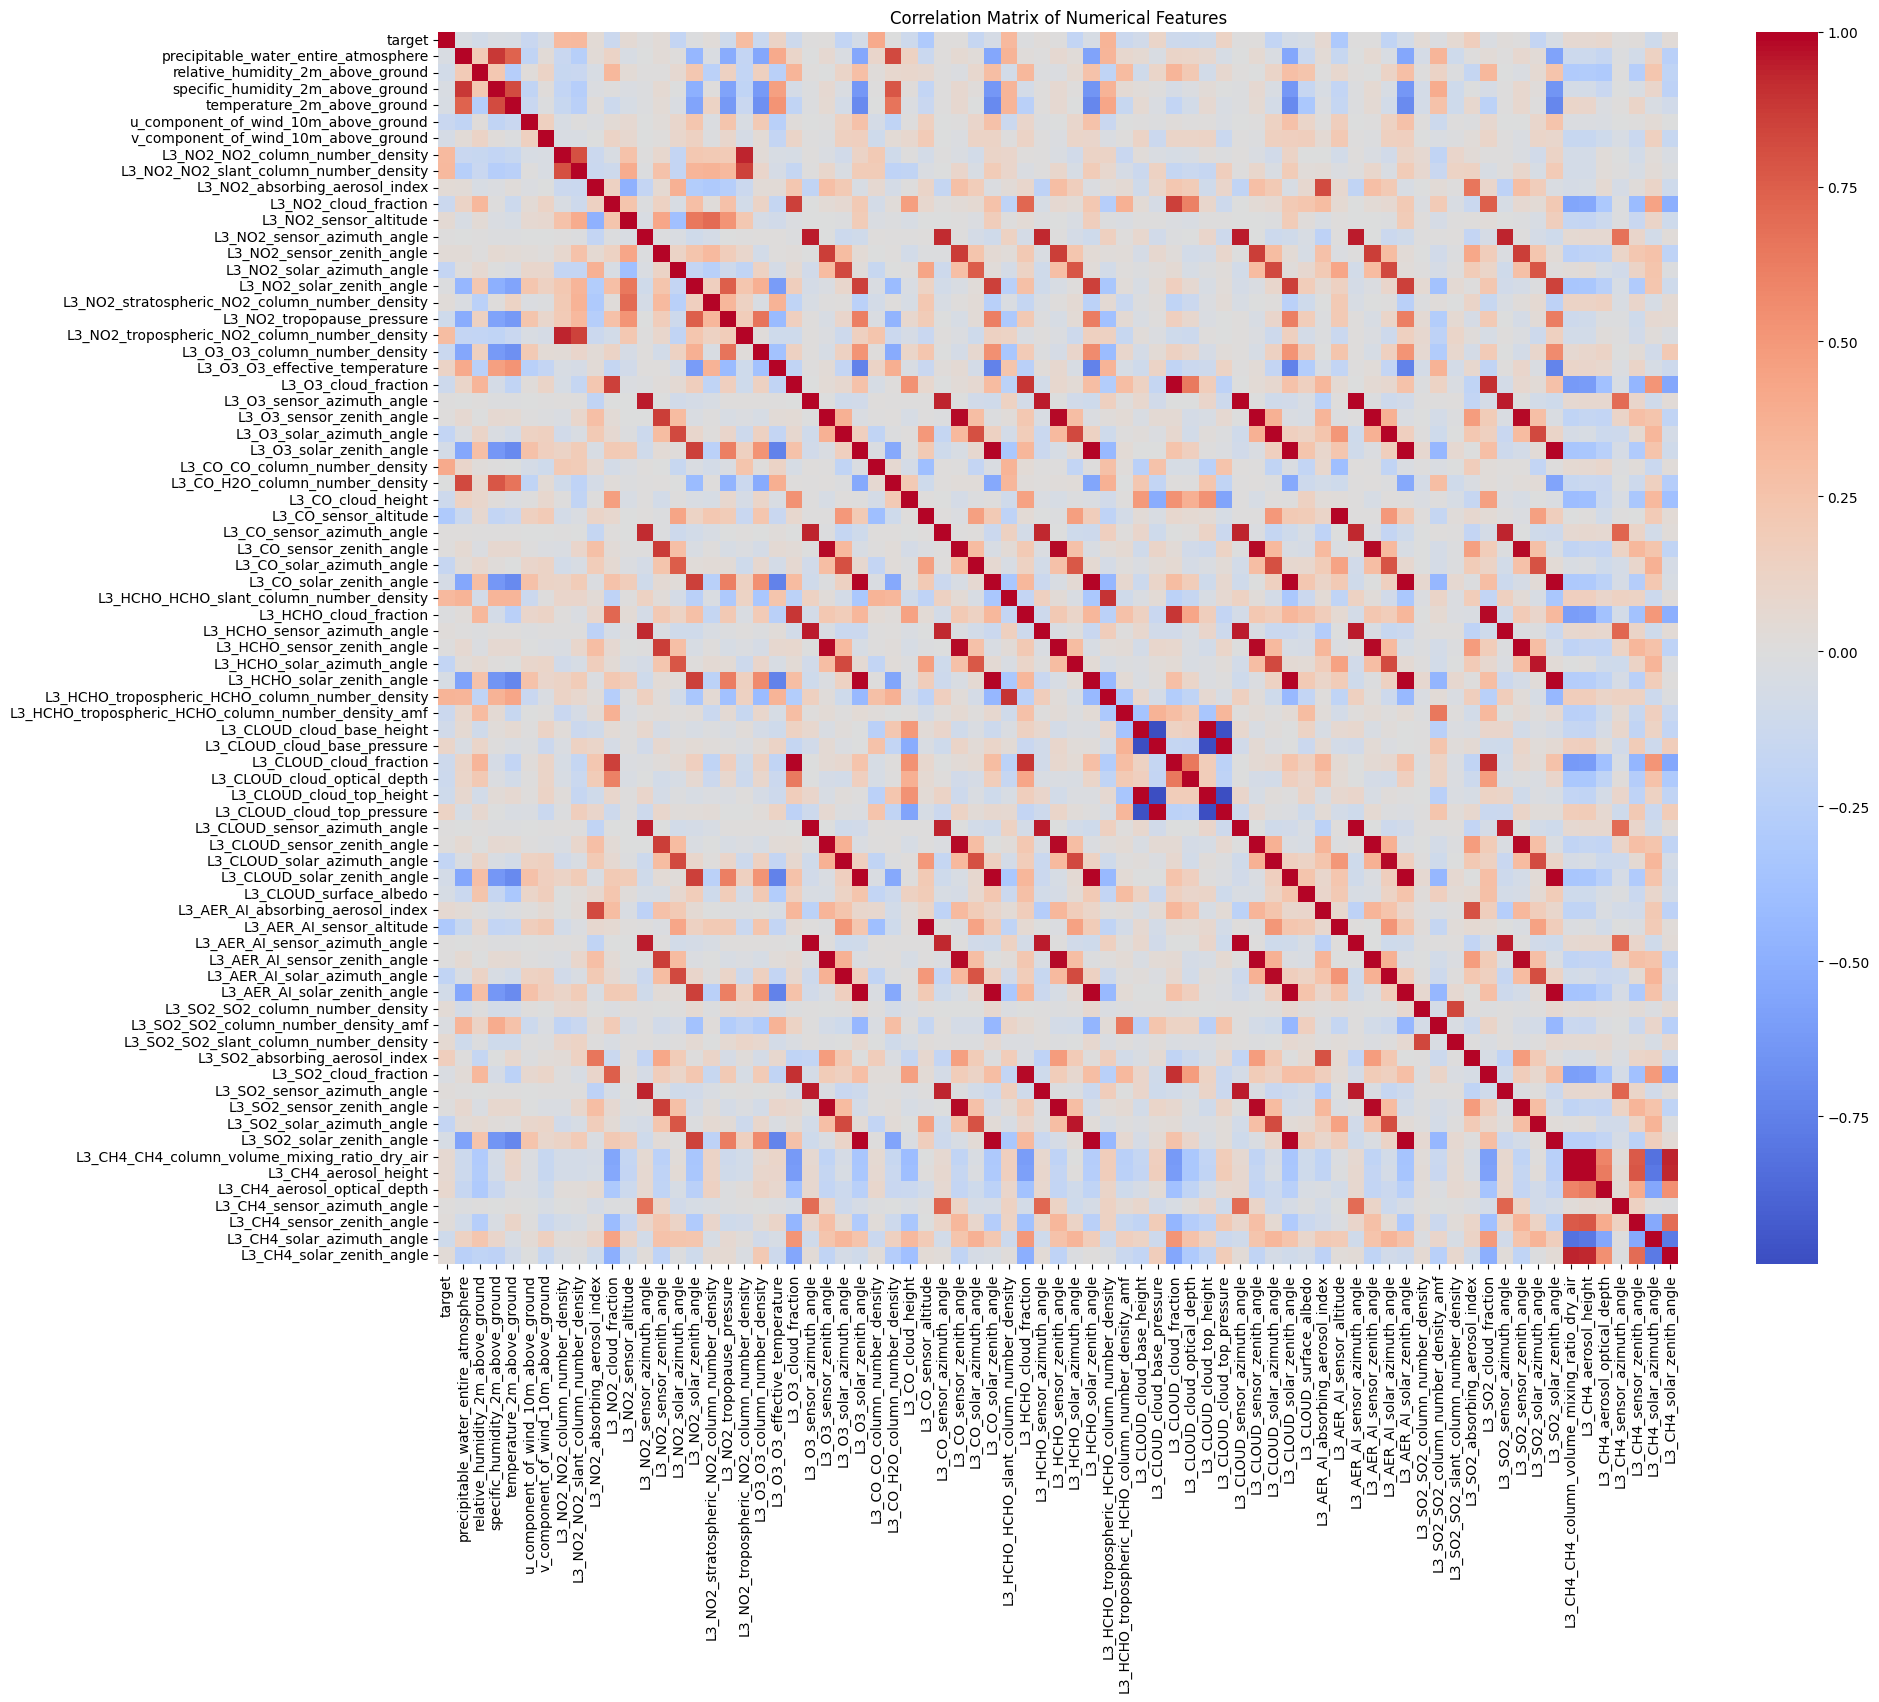

In [37]:
corr_matrix_1 = df_columns.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix_1, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [31]:
#To drop only one feature from each highly correlated pair, specifically the one with the least correlation with the target variable (called target in your df_columns), we need to modify your code to:
#
#Identify pairs of highly correlated features (correlation > 0.9).
#Drop one feature from each pair based on which one has the lowest correlation with the target variable.

In [39]:
df_columns.head(1)

,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,38.0,11.0,60.200001,0.00804,18.51684,1.996377,-1.227395,0.000074,0.000156,-1.23133,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.0,76.536426,38.593017,-61.752587,22.363665,0.02108,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.00001,0.0,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,NaN,NaN,0.0,NaN,NaN,NaN,76.536426,38.593017,-61.752587,22.363665,NaN,-1.23133,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.00004,-1.861476,0.0,76.536426,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118


In [59]:


# Step 1: Calculate the correlation matrix
corr_matrix = df_columns.corr().abs()  # Take the absolute value of the correlations

# Step 2: Create a boolean mask to ignore the upper triangle of the correlation matrix (since it's symmetric)
upper_triangle = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)

# Step 3: Identify highly correlated features (e.g., correlation > 0.7)
high_corr_pairs = corr_matrix.where(upper_triangle).stack().reset_index()
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > 0.7]

# Step 4: Calculate the correlation of each feature with the target variable
target_corr = df_columns.corr()['target'].abs()

# Step 5: Create a set to store features to drop
features_to_drop = set()

# Step 6: For each pair of highly correlated features, drop the one with the lower correlation to the target
for index, row in high_corr_pairs.iterrows():
    feature1 = row['Feature1']
    feature2 = row['Feature2']
    
    # Compare correlation with target, and add the one with lower correlation to drop
    if target_corr[feature1] < target_corr[feature2]:
        features_to_drop.add(feature1)
    else:
        features_to_drop.add(feature2)

# Step 7: Drop the identified features
print(f"Features to drop due to multicollinearity: {features_to_drop}")

df_columns_reduced = df_columns.drop(columns=features_to_drop)

# Now, df_columns_reduced is the DataFrame withou


Features to drop due to multicollinearity: {'L3_SO2_SO2_column_number_density', 'L3_SO2_solar_azimuth_angle', 'L3_CO_solar_zenith_angle', 'L3_CO_sensor_altitude', 'L3_CH4_sensor_azimuth_angle', 'L3_O3_sensor_azimuth_angle', 'precipitable_water_entire_atmosphere', 'temperature_2m_above_ground', 'L3_CLOUD_cloud_base_height', 'L3_CLOUD_sensor_azimuth_angle', 'L3_O3_cloud_fraction', 'L3_O3_sensor_zenith_angle', 'L3_CH4_solar_zenith_angle', 'L3_O3_solar_zenith_angle', 'L3_CO_sensor_azimuth_angle', 'L3_HCHO_sensor_azimuth_angle', 'L3_AER_AI_sensor_zenith_angle', 'specific_humidity_2m_above_ground', 'L3_HCHO_solar_azimuth_angle', 'L3_HCHO_cloud_fraction', 'L3_CLOUD_solar_azimuth_angle', 'L3_CLOUD_cloud_base_pressure', 'L3_CLOUD_cloud_fraction', 'L3_CH4_sensor_zenith_angle', 'L3_AER_AI_absorbing_aerosol_index', 'L3_CO_H2O_column_number_density', 'L3_NO2_solar_zenith_angle', 'L3_AER_AI_sensor_azimuth_angle', 'L3_CLOUD_cloud_top_height', 'L3_NO2_NO2_column_number_density', 'L3_HCHO_sensor_zenith

In [60]:

# Updated features to drop due to multicollinearity
features_to_drop = {
    'L3_SO2_SO2_column_number_density', 'L3_SO2_solar_azimuth_angle', 'L3_CO_solar_zenith_angle', 
    'L3_CO_sensor_altitude', 'L3_CH4_sensor_azimuth_angle', 'L3_O3_sensor_azimuth_angle', 
    'precipitable_water_entire_atmosphere', 'temperature_2m_above_ground', 'L3_CLOUD_cloud_base_height', 
    'L3_CLOUD_sensor_azimuth_angle', 'L3_O3_cloud_fraction', 'L3_O3_sensor_zenith_angle', 
    'L3_CH4_solar_zenith_angle', 'L3_O3_solar_zenith_angle', 'L3_CO_sensor_azimuth_angle', 
    'L3_HCHO_sensor_azimuth_angle', 'L3_AER_AI_sensor_zenith_angle', 'specific_humidity_2m_above_ground', 
    'L3_HCHO_solar_azimuth_angle', 'L3_HCHO_cloud_fraction', 'L3_CLOUD_solar_azimuth_angle', 
    'L3_CLOUD_cloud_base_pressure', 'L3_CLOUD_cloud_fraction', 'L3_CH4_sensor_zenith_angle', 
    'L3_AER_AI_absorbing_aerosol_index', 'L3_CO_H2O_column_number_density', 'L3_NO2_solar_zenith_angle', 
    'L3_AER_AI_sensor_azimuth_angle', 'L3_CLOUD_cloud_top_height', 'L3_NO2_NO2_column_number_density', 
    'L3_HCHO_sensor_zenith_angle', 'L3_SO2_sensor_zenith_angle', 'L3_CO_solar_azimuth_angle', 
    'L3_CLOUD_solar_zenith_angle', 'L3_NO2_absorbing_aerosol_index', 'L3_AER_AI_solar_zenith_angle', 
    'L3_CO_sensor_zenith_angle', 'L3_SO2_solar_zenith_angle', 'L3_SO2_cloud_fraction', 
    'L3_O3_solar_azimuth_angle', 'L3_CH4_aerosol_height', 'L3_CLOUD_sensor_zenith_angle', 
    'L3_HCHO_solar_zenith_angle', 'L3_CH4_CH4_column_volume_mixing_ratio_dry_air', 'L3_NO2_solar_azimuth_angle', 
    'L3_HCHO_HCHO_slant_column_number_density', 'L3_NO2_tropospheric_NO2_column_number_density', 
    'L3_NO2_sensor_azimuth_angle'
}


# Drop the specified columns from your DataFrame
df_columns_reduced = df_train_split.drop(columns=features_to_drop)

# Display the new DataFrame
df_columns_reduced.head(1)


,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_slant_column_number_density,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_CO_CO_column_number_density,L3_CO_cloud_height,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_pressure,L3_CLOUD_surface_albedo,L3_AER_AI_sensor_altitude,L3_AER_AI_solar_azimuth_angle,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_sensor_azimuth_angle,L3_CH4_aerosol_optical_depth,L3_CH4_solar_azimuth_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.5,92,60.200001,1.996377,-1.227395,0.000156,0.006507,840209.874619,38.634284,0.000057,6156.074219,0.119095,234.151102,0.02108,267.017184,0.000064,0.566828,NaN,NaN,NaN,840209.874619,-61.736719,0.312521,-0.00004,-1.861476,76.536426,0.010579,-62.142639


In [61]:
# Additional drops, because target min max is not needed, Place ID X date is gonna be in two columns)

columns_to_drop = [
    'Place_ID X Date', 'target_min', 'target_max', 
    'target_variance', 'target_count'
]

# Drop the specified columns from your DataFrame
df_cleaned_train = df_columns_reduced.drop(columns=columns_to_drop)

df_cleaned_train.head(1)


,Date,Place_ID,target,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_slant_column_number_density,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_CO_CO_column_number_density,L3_CO_cloud_height,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_pressure,L3_CLOUD_surface_albedo,L3_AER_AI_sensor_altitude,L3_AER_AI_solar_azimuth_angle,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_sensor_azimuth_angle,L3_CH4_aerosol_optical_depth,L3_CH4_solar_azimuth_angle
0,2020-01-02,010Q650,38.0,60.200001,1.996377,-1.227395,0.000156,0.006507,840209.874619,38.634284,0.000057,6156.074219,0.119095,234.151102,0.02108,267.017184,0.000064,0.566828,NaN,NaN,NaN,840209.874619,-61.736719,0.312521,-0.00004,-1.861476,76.536426,0.010579,-62.142639


In [62]:
# Define the categorical, time, and numerical columns
categorical_features = ["Place_ID"]  # Place_ID is categorical
time_features = ["Date"]  # Date is the time variable

numerical_features = [
    'relative_humidity_2m_above_ground',
    'u_component_of_wind_10m_above_ground',
    'v_component_of_wind_10m_above_ground',
    'L3_NO2_NO2_slant_column_number_density',
    'L3_NO2_cloud_fraction',
    'L3_NO2_sensor_altitude',
    'L3_NO2_sensor_zenith_angle',
    'L3_NO2_stratospheric_NO2_column_number_density',
    'L3_NO2_tropopause_pressure',
    'L3_O3_O3_column_number_density',
    'L3_O3_O3_effective_temperature',
    'L3_CO_CO_column_number_density',
    'L3_CO_cloud_height',
    'L3_HCHO_tropospheric_HCHO_column_number_density',
    'L3_HCHO_tropospheric_HCHO_column_number_density_amf',
    'L3_CLOUD_cloud_optical_depth',
    'L3_CLOUD_cloud_top_pressure',
    'L3_CLOUD_surface_albedo',
    'L3_AER_AI_sensor_altitude',
    'L3_AER_AI_solar_azimuth_angle',
    'L3_SO2_SO2_column_number_density_amf',
    'L3_SO2_SO2_slant_column_number_density',
    'L3_SO2_absorbing_aerosol_index',
    'L3_SO2_sensor_azimuth_angle',
    'L3_CH4_aerosol_optical_depth',
    'L3_CH4_solar_azimuth_angle'
]



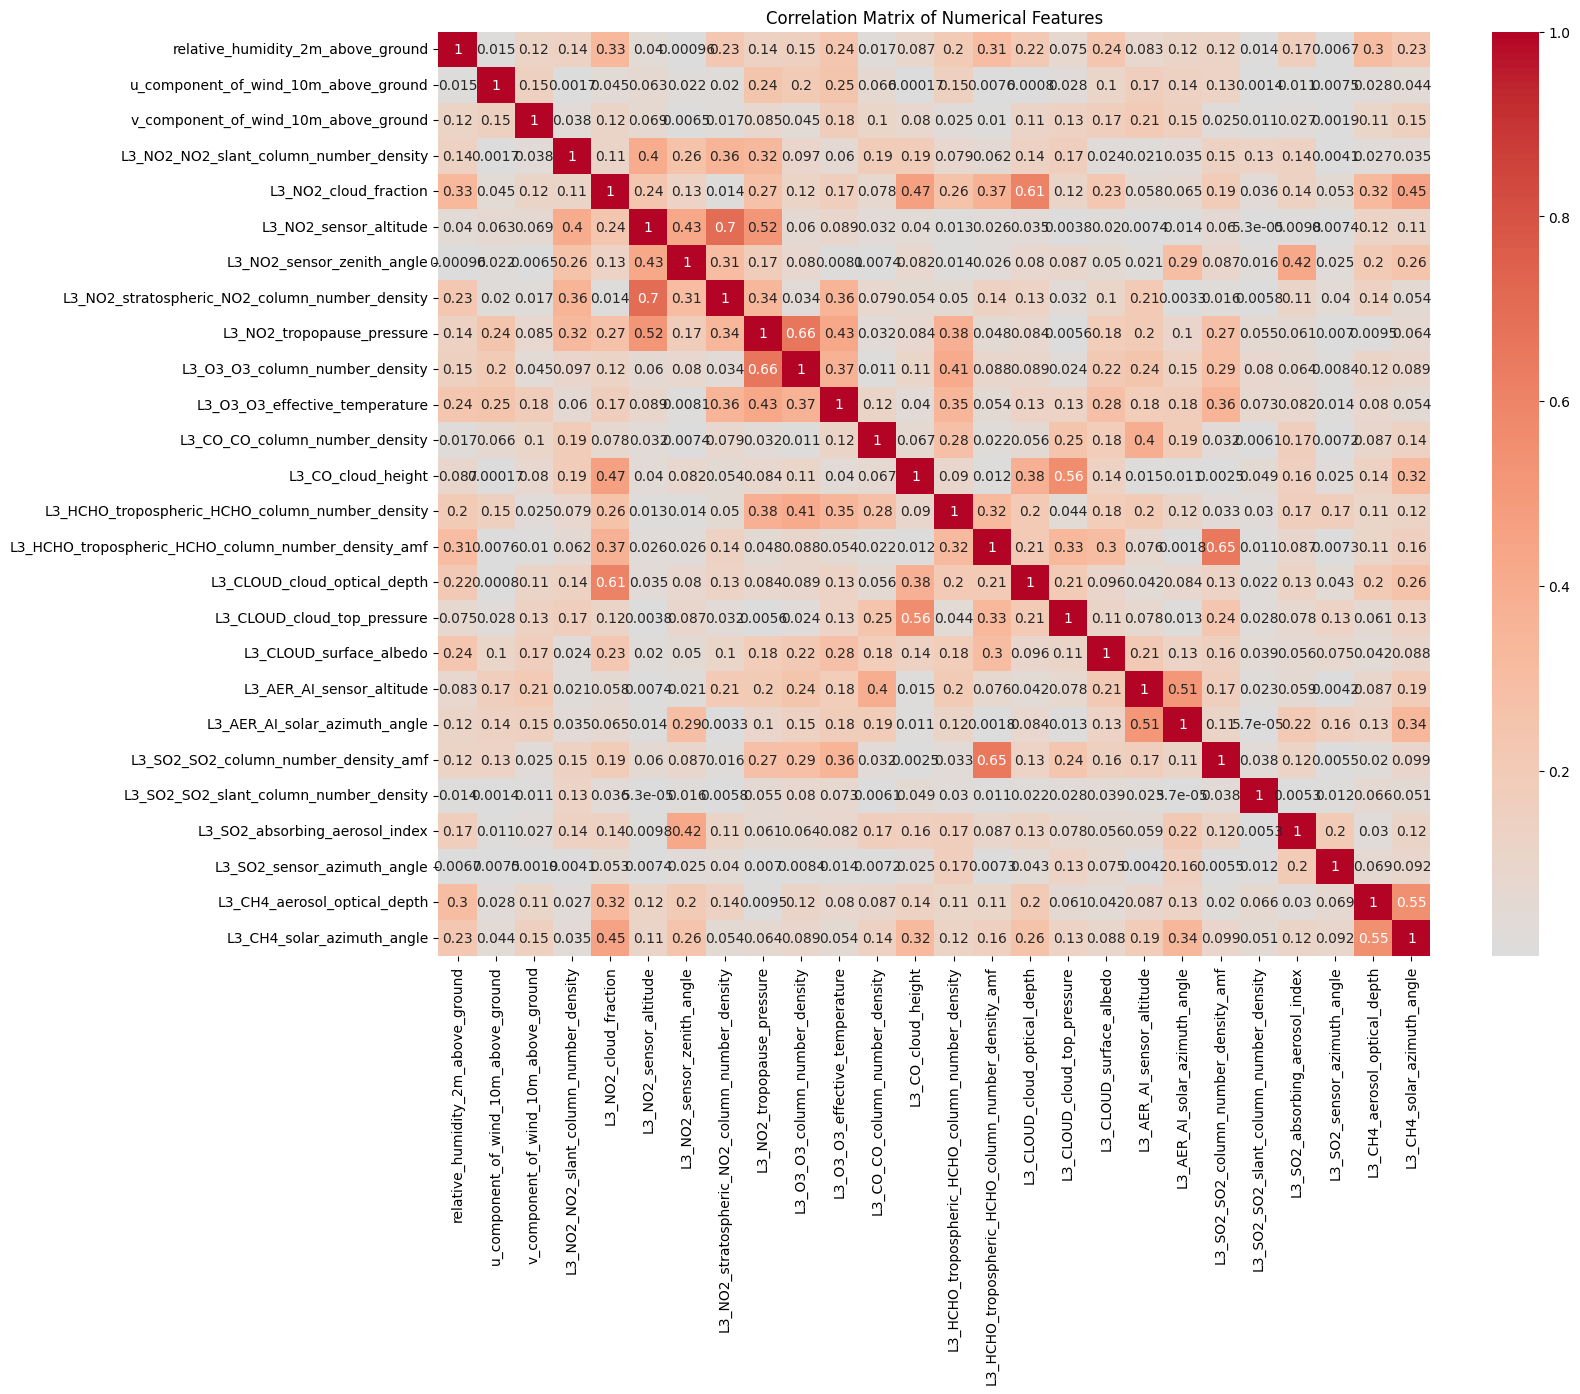

In [63]:
# Assuming df_train_split is your DataFrame containing the features
# Select only numerical features for correlation analysis
numerical_data = df_train_split[numerical_features]

# Calculate the correlation matrix
corr_matrix = numerical_data.corr().abs()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()



In [99]:

# Custom transformer for mean imputation per Place_ID
class MeanImputerPerLocation(BaseEstimator, TransformerMixin):
    def __init__(self, numerical_features, group_by_col="Place_ID"):
        self.numerical_features = numerical_features
        self.group_by_col = group_by_col
    
    def fit(self, X, y=None):
        return self  # No fitting necessary for imputation logic
    
    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame
        for feature in self.numerical_features:
            X[feature] = X.groupby(self.group_by_col)[feature].transform(lambda x: x.fillna(x.mean()))
        return X

# Define the feature columns
categorical_features = ["Place_ID"]  # Categorical feature
numerical_features = [
    'relative_humidity_2m_above_ground',
    'u_component_of_wind_10m_above_ground',
    'v_component_of_wind_10m_above_ground',
    'L3_NO2_NO2_slant_column_number_density',
    'L3_NO2_cloud_fraction',
    'L3_NO2_sensor_altitude',
    'L3_NO2_sensor_zenith_angle',
    'L3_NO2_stratospheric_NO2_column_number_density',
    'L3_NO2_tropopause_pressure',
    'L3_O3_O3_column_number_density',
    'L3_O3_O3_effective_temperature',
    'L3_CO_CO_column_number_density',
    'L3_CO_cloud_height',
    'L3_HCHO_tropospheric_HCHO_column_number_density',
    'L3_HCHO_tropospheric_HCHO_column_number_density_amf',
    'L3_CLOUD_cloud_optical_depth',
    'L3_CLOUD_cloud_top_pressure',
    'L3_CLOUD_surface_albedo',
    'L3_AER_AI_sensor_altitude',
    'L3_AER_AI_solar_azimuth_angle',
    'L3_SO2_SO2_column_number_density_amf',
    'L3_SO2_SO2_slant_column_number_density',
    'L3_SO2_absorbing_aerosol_index',
    'L3_SO2_sensor_azimuth_angle',
    'L3_CH4_aerosol_optical_depth',
    'L3_CH4_solar_azimuth_angle'
]

# Define the preprocessing for numerical features: Imputation and Standardization
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('fallback_imputer', SimpleImputer(strategy='mean'))  # Fallback imputation for any remaining NaNs
])

# Define the preprocessing for categorical features: One-hot encode Place_ID
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define the full pipeline with the custom imputer, preprocessing, and regression model
model = Pipeline(steps=[
    ('mean_imputer', MeanImputerPerLocation(numerical_features=numerical_features)),
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Define the target variable
y_train = df_train_split["target"]
X_train = df_train_split[numerical_features + categorical_features]

y_test = df_test_split["target"]
X_test = df_test_split[numerical_features + categorical_features]

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert MAPE to percentage
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Percentage Error (MAPE): 108.06%


Key Changes:

Updated Feature Lists: The new numerical_features and categorical_features have been incorporated.

Target Column: The target column is the dependent variable for model prediction.

Mean Imputation: The custom imputer ensures that missing values in numerical features are imputed with the mean, group-wise by Place_ID.

LinearRegression: A simple linear regression model is used, which serves as your baseline model.

 and we can add a fallback imputation (like SimpleImputer) for any remaining NaNs that may not be handled by the custom imputer.

In [67]:
# Check if there are very small or zero values in the actual target values
print("Minimum value in y_test:", y_test.min())
print("Maximum value in y_test:", y_test.max())

# Check for any zero or near-zero values
print("Count of zero or near-zero values in y_test:", (y_test < 1e-5).sum())


Minimum value in y_test: 2.0
Maximum value in y_test: 182.0
Count of zero or near-zero values in y_test: 0


In [100]:
# Custom transformer for mean imputation per Place_ID
class MeanImputerPerLocation(BaseEstimator, TransformerMixin):
    def __init__(self, numerical_features, group_by_col="Place_ID"):
        self.numerical_features = numerical_features
        self.group_by_col = group_by_col
    
    def fit(self, X, y=None):
        return self  # No fitting necessary for imputation logic
    
    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame
        if self.group_by_col not in X.columns:
            raise KeyError(f"'{self.group_by_col}' column is missing from the input DataFrame")
        for feature in self.numerical_features:
            X[feature] = X.groupby(self.group_by_col)[feature].transform(lambda x: x.fillna(x.mean()))
        return X

# Define the feature columns
categorical_features = ["Place_ID"]  # Categorical feature
numerical_features = [
    'relative_humidity_2m_above_ground',
    'u_component_of_wind_10m_above_ground',
    'v_component_of_wind_10m_above_ground',
    'L3_NO2_NO2_slant_column_number_density',
    'L3_NO2_cloud_fraction',
    'L3_NO2_sensor_altitude',
    'L3_NO2_sensor_zenith_angle',
    'L3_NO2_stratospheric_NO2_column_number_density',
    'L3_NO2_tropopause_pressure',
    'L3_O3_O3_column_number_density',
    'L3_O3_O3_effective_temperature',
    'L3_CO_CO_column_number_density',
    'L3_CO_cloud_height',
    'L3_HCHO_tropospheric_HCHO_column_number_density',
    'L3_HCHO_tropospheric_HCHO_column_number_density_amf',
    'L3_CLOUD_cloud_optical_depth',
    'L3_CLOUD_cloud_top_pressure',
    'L3_CLOUD_surface_albedo',
    'L3_AER_AI_sensor_altitude',
    'L3_AER_AI_solar_azimuth_angle',
    'L3_SO2_SO2_column_number_density_amf',
    'L3_SO2_SO2_slant_column_number_density',
    'L3_SO2_absorbing_aerosol_index',
    'L3_SO2_sensor_azimuth_angle',
    'L3_CH4_aerosol_optical_depth',
    'L3_CH4_solar_azimuth_angle'
]

# Define the preprocessing for numerical features: Imputation and Standardization
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('fallback_imputer', SimpleImputer(strategy='mean'))  # Fallback imputation for any remaining NaNs
])

# Define the preprocessing for categorical features: One-hot encode Place_ID
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define the full pipeline with the custom imputer, preprocessing, and regression model
model = Pipeline(steps=[
    ('mean_imputer', MeanImputerPerLocation(numerical_features=numerical_features)),
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Define the target variable
y_train = df_train_split["target"]
X_train = df_train_split[numerical_features + categorical_features]

y_test = df_test_split["target"]
X_test = df_test_split[numerical_features + categorical_features]

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using Mean Absolute Percentage Error (MAPE)
# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print RMSE
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Root Mean Squared Error (RMSE): 48.32


THE MODEL IS OPTIMIZING MSE . ITS UNFAIR to USE MAPE because staandard - lets compute RMSE - 

In [77]:
# Investigate
# Compare predicted and actual values
comparison_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(comparison_df.head(10))  # Print the first 10 rows for comparison


   Actual  Predicted
0    59.0 -17.088193
1    61.0 -13.746863
2    45.0 -20.645130
3    13.0  38.260169
4    17.0  -5.975986
5    38.0  15.474659
6    57.0  79.777049
7    60.0  27.732077
8    92.0  47.377622
9    13.0 -15.903887


In [78]:
residuals = y_test - y_pred
print("Mean of Residuals:", residuals.mean())
print("Standard Deviation of Residuals:", residuals.std())


Mean of Residuals: 33.302304143122925
Standard Deviation of Residuals: 35.032858025916646


In [82]:
from sklearn.metrics import median_absolute_error

# Calculate Median Absolute Error as an alternative
medape = median_absolute_error(y_test, y_pred)
print(f"Median Absolute Error: {medape}")

Median Absolute Error: 15.491356011525525


In [83]:
epsilon = 1e-5  # A small number to avoid division by zero
mape = np.mean(np.abs((y_test - y_pred) / (y_test + epsilon))) * 100  # Adjusted MAPE
print(f"Adjusted Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Adjusted Mean Absolute Percentage Error (MAPE): 46.28%


Key Observations:

Negative Predictions: Some of your predicted values are negative (e.g., -17.09, -13.74, etc.), which is problematic because air pollution levels (or any real-world target you're predicting) should not be negative. This indicates that the model is either not capturing the underlying pattern well or is being influenced by noisy or non-predictive features.

High Residual Mean and Standard Deviation: The mean of the residuals (33.30) and the standard deviation of the residuals (35.03) are both quite high. This indicates that your model consistently over- or underestimates the target, and there's a lot of variance in the errors, which further shows that the predictions are not reliable.

Median Absolute Error: The Median Absolute Error is 15.49, which suggests that half of your errors are above this threshold. This value is relatively large compared to your actual values, indicating poor prediction accuracy.
Adjusted MAPE: The Adjusted MAPE is 46.28%, which is still high, though better than the original 108.6%. This further reinforces that the model is not making accurate predictions, particularly for certain ranges of the target variable.

Linear Regression may not be suitable for this problem, especially if the relationship between the features and the target variable is non-linear. You should try more complex models like:


In [84]:
from sklearn.ensemble import GradientBoostingRegressor

model = Pipeline(steps=[
    ('mean_imputer', MeanImputerPerLocation(numerical_features=numerical_features)),
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())  # Switch to Gradient Boosting
])

# Fit the model and make predictions
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate MAPE again
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print(f"MAPE with GradientBoosting: {mape:.2f}%")


MAPE with GradientBoosting: 56.12%


Maybe there are Data Quality Problems?

In [87]:
# Check for missing values in each column
missing_values = df_train_split.isnull().sum()
print("Missing values in the dataset:")
print(missing_values[missing_values > 0])


Missing values in the dataset:
L3_NO2_NO2_column_number_density                        2186
L3_NO2_NO2_slant_column_number_density                  2186
L3_NO2_absorbing_aerosol_index                          2186
L3_NO2_cloud_fraction                                   2186
L3_NO2_sensor_altitude                                  2186
L3_NO2_sensor_azimuth_angle                             2186
L3_NO2_sensor_zenith_angle                              2186
L3_NO2_solar_azimuth_angle                              2186
L3_NO2_solar_zenith_angle                               2186
L3_NO2_stratospheric_NO2_column_number_density          2186
L3_NO2_tropopause_pressure                              2186
L3_NO2_tropospheric_NO2_column_number_density           8662
L3_O3_O3_column_number_density                           210
L3_O3_O3_effective_temperature                           210
L3_O3_cloud_fraction                                     210
L3_O3_sensor_azimuth_angle                            

In [89]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df_train_split[numerical_features]))
outliers = np.where(z_scores > 3)
print("Number of outliers in numerical features (Z-score > 3):", len(outliers[0]))


z_scores = np.abs(stats.zscore(df_train_split[numerical_features]))
outliers = np.where(z_scores > 3)
print("Number of outliers in numerical features (Z-score > 3):", len(outliers[0]))


Number of outliers in numerical features (Z-score > 3): 765
Number of outliers in numerical features (Z-score > 3): 765


In [90]:
Q1 = df_train_split[numerical_features].quantile(0.25)
Q3 = df_train_split[numerical_features].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df_train_split[numerical_features] < (Q1 - 1.5 * IQR)) | (df_train_split[numerical_features] > (Q3 + 1.5 * IQR))).sum()
print("Number of outliers in numerical features (IQR method):")
print(outliers_iqr)

Number of outliers in numerical features (IQR method):
relative_humidity_2m_above_ground                       194
u_component_of_wind_10m_above_ground                   1413
v_component_of_wind_10m_above_ground                   1074
L3_NO2_NO2_slant_column_number_density                 3567
L3_NO2_cloud_fraction                                     0
L3_NO2_sensor_altitude                                 2846
L3_NO2_sensor_zenith_angle                                0
L3_NO2_stratospheric_NO2_column_number_density         1843
L3_NO2_tropopause_pressure                                0
L3_O3_O3_column_number_density                           58
L3_O3_O3_effective_temperature                         1194
L3_CO_CO_column_number_density                         1902
L3_CO_cloud_height                                        0
L3_HCHO_tropospheric_HCHO_column_number_density         853
L3_HCHO_tropospheric_HCHO_column_number_density_amf     807
L3_CLOUD_cloud_optical_depth                 

In [91]:
from sklearn.feature_selection import VarianceThreshold

# Set a threshold for variance; features with variance below this threshold will be removed
threshold = 0.01
variance_filter = VarianceThreshold(threshold=threshold)
variance_filter.fit(df_train_split[numerical_features])

low_variance_features = [col for col, var in zip(numerical_features, variance_filter.variances_) if var < threshold]
print("Low variance features:", low_variance_features)


Low variance features: ['L3_NO2_NO2_slant_column_number_density', 'L3_NO2_stratospheric_NO2_column_number_density', 'L3_O3_O3_column_number_density', 'L3_CO_CO_column_number_density', 'L3_HCHO_tropospheric_HCHO_column_number_density', 'L3_SO2_SO2_slant_column_number_density', 'L3_CH4_aerosol_optical_depth']


In [92]:
duplicate_rows = df_train_split[df_train_split.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")


Number of duplicate rows: 0


In [93]:
# Example: Checking if 'relative_humidity_2m_above_ground' is within [0, 100]
inconsistent_humidity = df_train_split[(df_train_split['relative_humidity_2m_above_ground'] < 0) |
                                       (df_train_split['relative_humidity_2m_above_ground'] > 100)]
print(f"Inconsistent humidity records: {inconsistent_humidity.shape[0]}")


Inconsistent humidity records: 0


In [94]:
print(df_train_split.dtypes)


Place_ID X Date                                                object
Date                                                   datetime64[ns]
Place_ID                                                       object
target                                                        float64
target_min                                                    float64
target_max                                                    float64
target_variance                                               float64
target_count                                                    int64
precipitable_water_entire_atmosphere                          float64
relative_humidity_2m_above_ground                             float64
specific_humidity_2m_above_ground                             float64
temperature_2m_above_ground                                   float64
u_component_of_wind_10m_above_ground                          float64
v_component_of_wind_10m_above_ground                          float64
L3_NO2_NO2_column_nu

In [95]:
corr_matrix = df_train_split[numerical_features].corr().abs()
high_corr_pairs = corr_matrix.stack().reset_index().query('level_0 != level_1 and 0.7 <= 0 < 1')
print("Highly correlated features (correlation > 0.7):")
print(high_corr_pairs)


Highly correlated features (correlation > 0.7):
Empty DataFrame
Columns: [level_0, level_1, 0]
Index: []


In [101]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
import numpy as np

# Define the feature columns
categorical_features = ["Place_ID"]
numerical_features = [
    'relative_humidity_2m_above_ground',
    'u_component_of_wind_10m_above_ground',
    'v_component_of_wind_10m_above_ground',
    'L3_NO2_NO2_slant_column_number_density',
    'L3_NO2_cloud_fraction',
    'L3_NO2_sensor_altitude',
    'L3_NO2_sensor_zenith_angle',
    'L3_NO2_stratospheric_NO2_column_number_density',
    'L3_NO2_tropopause_pressure',
    'L3_O3_O3_column_number_density',
    'L3_O3_O3_effective_temperature',
    'L3_CO_CO_column_number_density',
    'L3_CO_cloud_height',
    'L3_HCHO_tropospheric_HCHO_column_number_density',
    'L3_HCHO_tropospheric_HCHO_column_number_density_amf',
    'L3_CLOUD_cloud_optical_depth',
    'L3_CLOUD_cloud_top_pressure',
    'L3_CLOUD_surface_albedo',
    'L3_AER_AI_sensor_altitude',
    'L3_AER_AI_solar_azimuth_angle',
    'L3_SO2_SO2_column_number_density_amf',
    'L3_SO2_SO2_slant_column_number_density',
    'L3_SO2_absorbing_aerosol_index',
    'L3_SO2_sensor_azimuth_angle',
    'L3_CH4_aerosol_optical_depth',
    'L3_CH4_solar_azimuth_angle'
]

# Step 1: Handle numerical transformations
numerical_transformer = Pipeline(steps=[
    ('variance_filter', VarianceThreshold(threshold=0.01)),  # Remove low variance features
    ('scaler', RobustScaler()),  # Handle outliers by scaling robustly
    ('knn_imputer', KNNImputer(n_neighbors=5))  # Impute any remaining missing values
])

# Step 2: Handle categorical transformations
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the transformations into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Step 3: Build the pipeline with preprocessing and regression model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', HuberRegressor())
])

# Define the target variable
y_train = df_train_split["target"]
X_train = df_train_split[numerical_features + categorical_features]

y_test = df_test_split["target"]
X_test = df_test_split[numerical_features + categorical_features]

# Fit the model on the training data
model_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_pipeline.predict(X_test)

# Evaluate the model using Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert MAPE to percentage
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print RMSE
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Percentage Error (MAPE): 714.36%
Root Mean Squared Error (RMSE): 295.05
